<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning1/blob/main/linearRegMetrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
data= load_diabetes()


In [ ]:
X=data.data
X.shape

(442, 10)

In [ ]:
y=data.target
y.shape

(442,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score",r2_score(y_test,y_pred))


RMSE 55.627840795469155
R2 score 0.4399338661568968


In [ ]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
lr.intercept_

np.float64(151.88331005254167)

Ridge Regression

In [ ]:
rLr=Ridge(alpha=0.1)

In [ ]:
rLr.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred1=rLr.predict(X_test)

In [ ]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score",r2_score(y_test,y_pred1))

RMSE 55.02560551161431
R2 score 0.45199494197195456


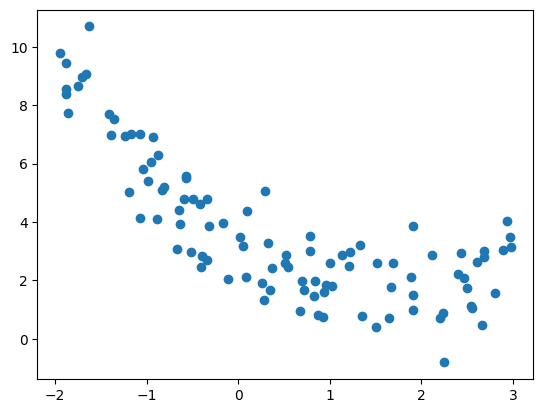

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def get_preds_ridge(x1,x2,alpha,degree):

  #Model Prepration

  model=Pipeline([("poly_reg", PolynomialFeatures(degree)),("ridge", Ridge(alpha))])

  #fit model
  model.fit(x1,x2)

  return model.predict(x1)

In [ ]:
alphas=[0,20,200]
cs=['r','g', 'b']

r2-score 0.8615662501585815 Alpha: 0
r2-score 0.8343465316157415 Alpha: 20
r2-score 0.7711135051420064 Alpha: 200


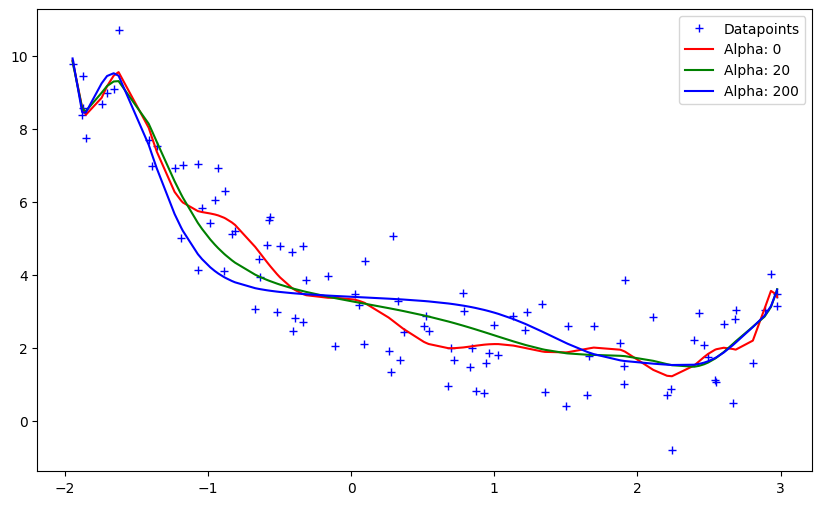

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha,16)
    print("r2-score",r2_score(x2,preds),'Alpha: {}'.format(alpha))
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import Ridge

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)



def polynomial_regression(degree,aplha):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = Ridge(alpha)


    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)

    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', linewidth=2, label='Alpha: {}'.format(alpha))

    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()




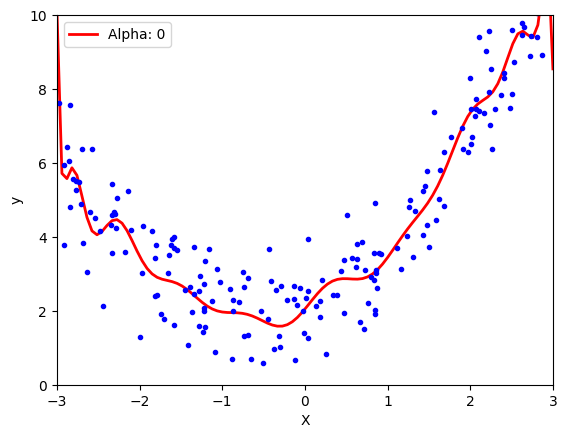

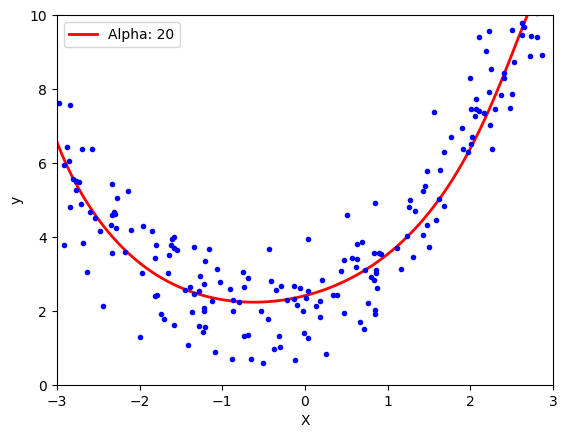

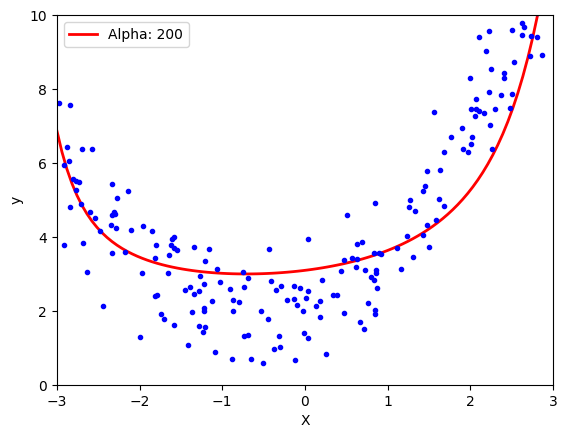

In [ ]:
alphas=[0,20,200]
for alpha in alphas:
  polynomial_regression(20,alpha)